In [20]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_qnv'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_qnv/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_Qnv.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_qnv.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_qnv.npy"), S_var)

In [23]:
for L in [5, 6, 7]:
    t = 10.0*L
    tt = 10*L
    for T in [t]:
        for p in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            for d in ["Z"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,50,tt)

In [26]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/s3_data/mean_qnv'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Emean_L5,T50.0,dt1.0,p0.5_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_5
Moved Evar_L5,T50.0,dt1.0,p0.8_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_5
Moved Evar_L6,T60.0,dt1.0,p0.8_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_6
Moved Emean_L6,T60.0,dt1.0,p0.5_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_6
Moved Emean_L7,T70.0,dt1.0,p0.0_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_7
Moved Evar_L5,T50.0,dt1.0,p0.1_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_5
Moved Evar_L6,T60.0,dt1.0,p0.1_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_6
Moved Emean_L7,T70.0,dt1.0,p0.9_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_7
Moved Evar_L7,T70.0,dt1.0,p0.4_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_7
Moved Evar_L5,T50.0,dt1.0,p0.0_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_5
Moved Emean_L7,T70.0,dt1.0,p0.8_qnv.npy → /Users/uditvarma/Documents/s3_data/mean_qnv/L_7
Moved Evar_L7,T7

In [27]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/s3_data/mean_qnv'

# List of L values
L_list = [5, 6, 7]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Moved Evar_L5,T50.0,dt1.0,p0.8_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.1_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.0_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.9_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.2_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p1.0_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.3_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.6_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.7_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.5_qnv.npy to /Users/uditvarma/Documents/s3_data/mean_qnv/L_5/var
Moved Evar_L5,T50.0,dt1.0,p0.4_qnv.npy to /Users/uditvarma/D

In [28]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_qnv'

# List of L values you want to process
L_values = [5, 6, 7]

# Loop through each L value
for L in L_values:
    # Create the directory path dynamically based on L
    data_dir = os.path.join(base_dir, f'L_{L}')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the first data points
    last_data_points = []

    # Loop through the files and collect the first data point
    for file_name in file_list:
        data = np.load(os.path.join(data_dir, file_name))
        last_data_points.append(data[-1])  # Collect first data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Data for L=5 saved to: /Users/uditvarma/Documents/s3_data/mean_qnv/timeT_points_L5.npy
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_qnv/timeT_points_L6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_qnv/timeT_points_L7.npy


The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

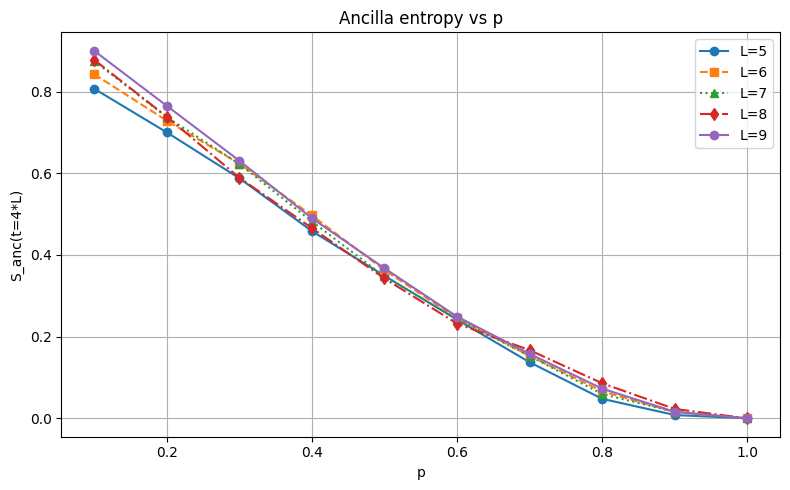

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

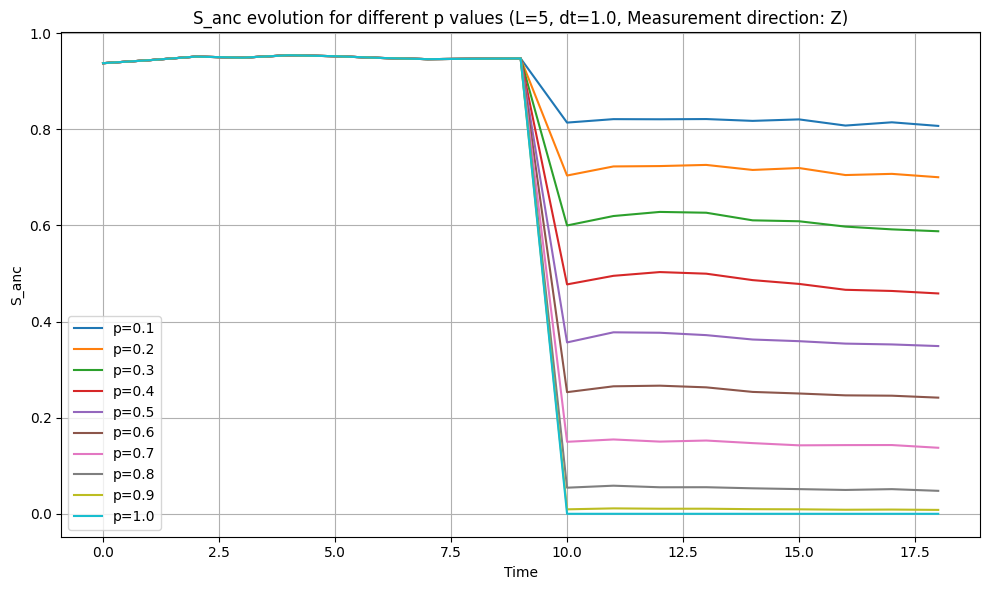

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z.svg')
plt.show()


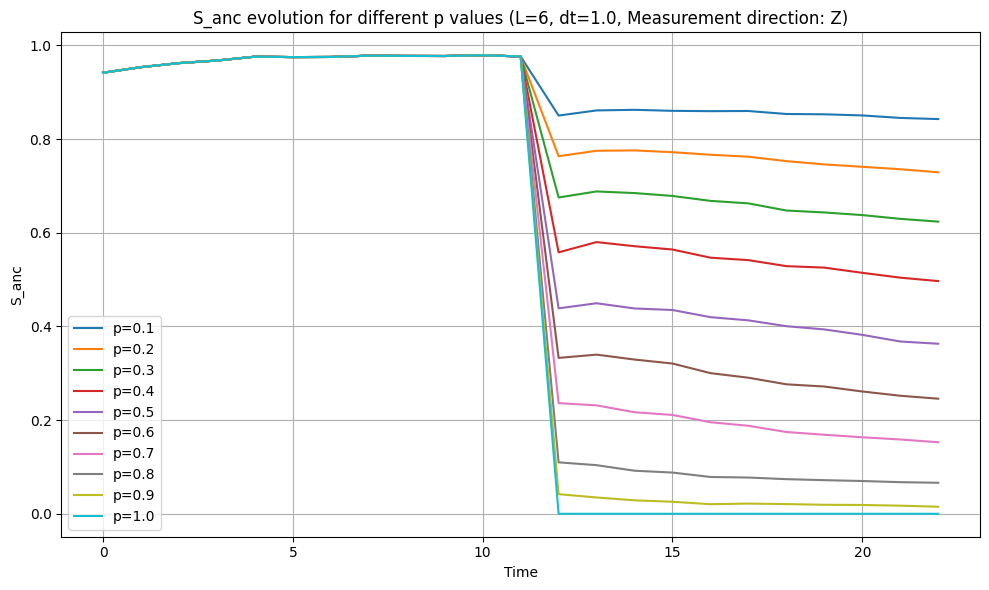

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z.svg')
plt.show()


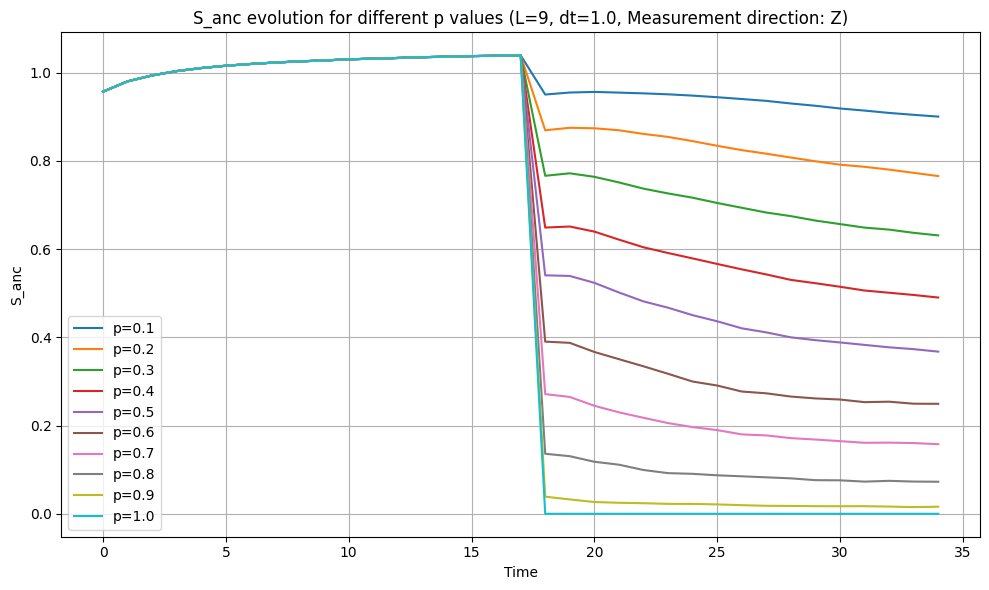

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/19 Aug 2025/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z.svg')
plt.show()

The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |00 \dots\rangle |0\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

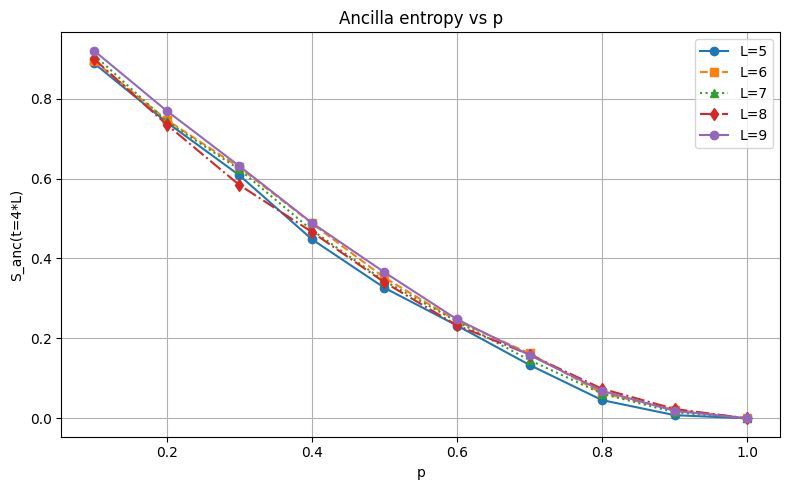

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3_ghz.svg')
# plt.savefig('I3T_p_Z.png')

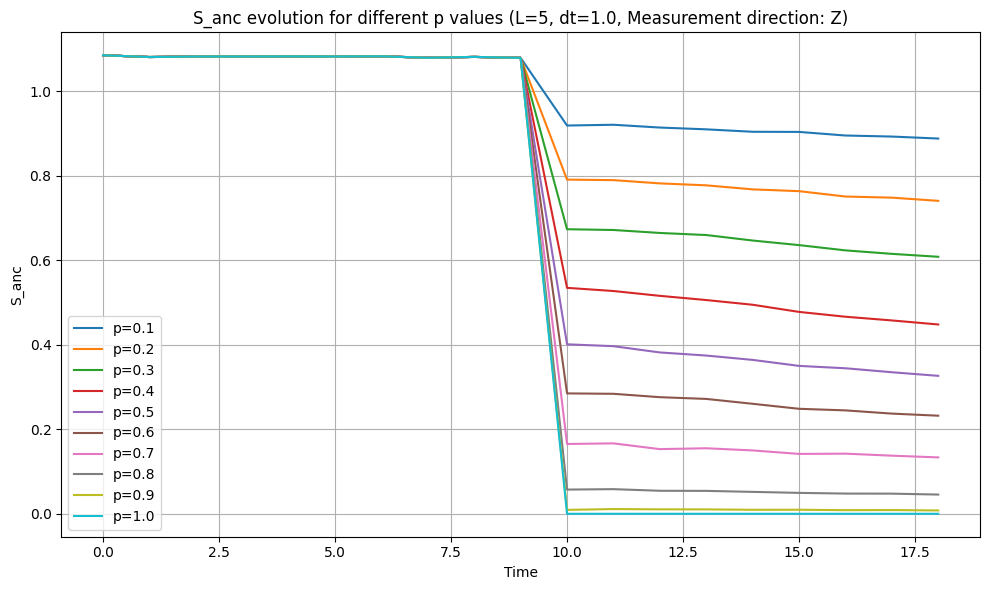

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z_ghz.svg')
plt.show()


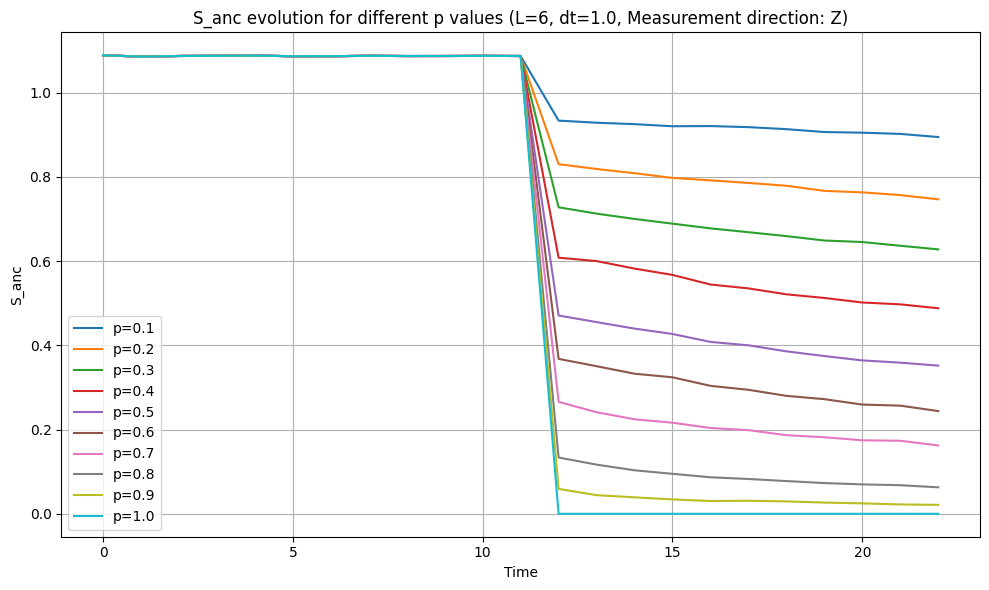

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z_ghz.svg')
plt.show()


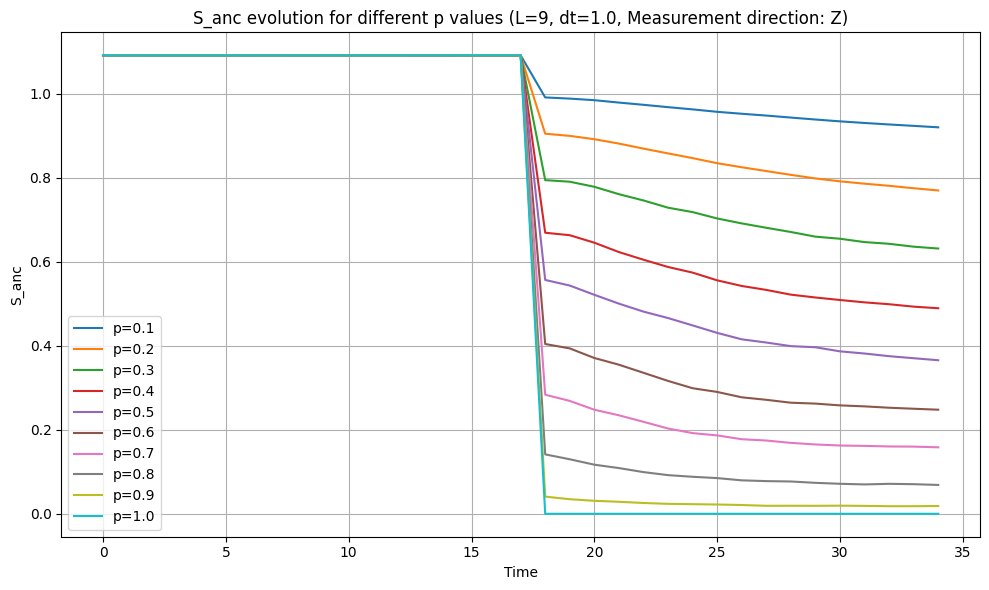

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z_ghz.svg')
plt.show()


Analysing the saturation of the ancilla entropies:

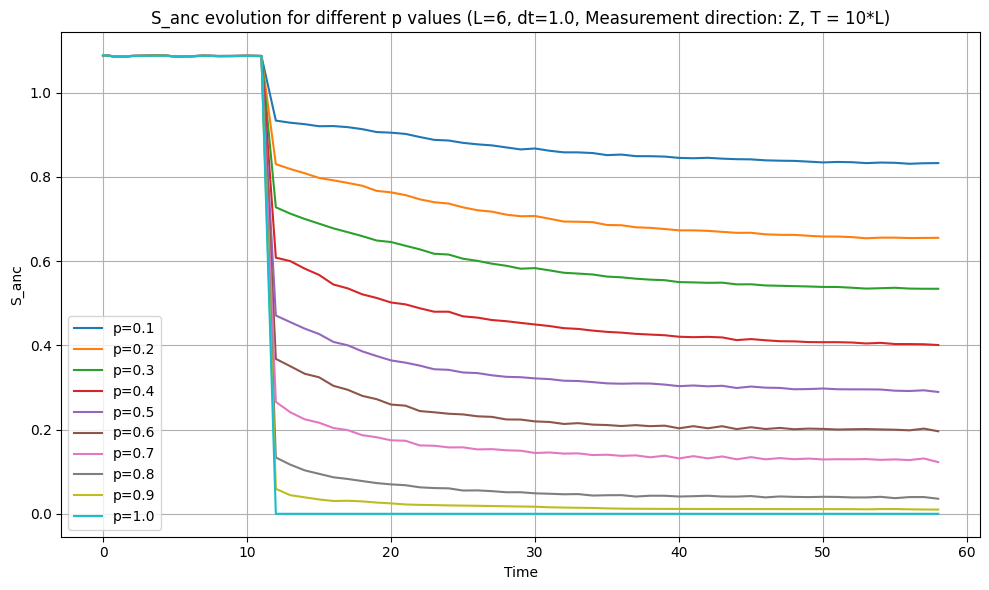

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z, T = 10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t10L_z_ghz.svg')
plt.show()


Purification results for T=10*L

The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |00 \dots\rangle |0\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

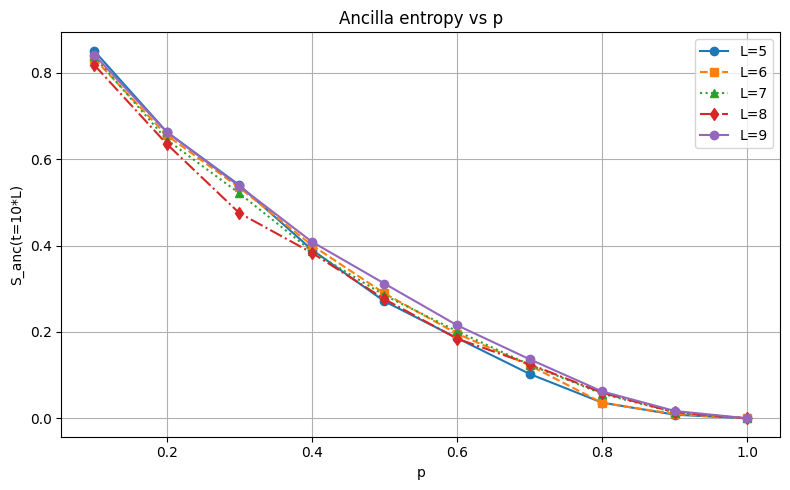

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T10L_vs_p_s3_ghz.svg')
# plt.savefig('I3T_p_Z.png')

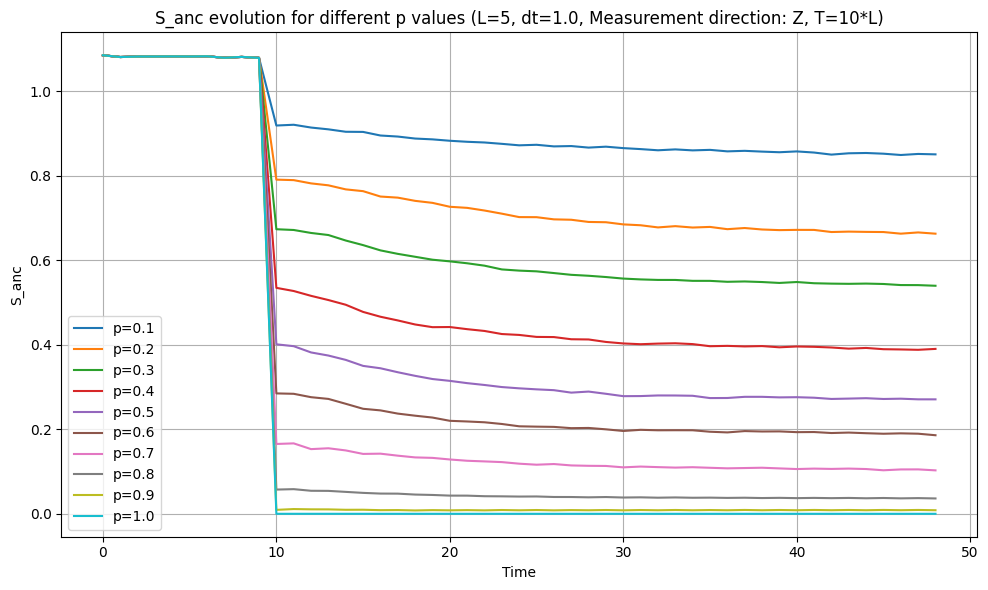

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z, T=10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t10L_z_ghz.svg')
plt.show()


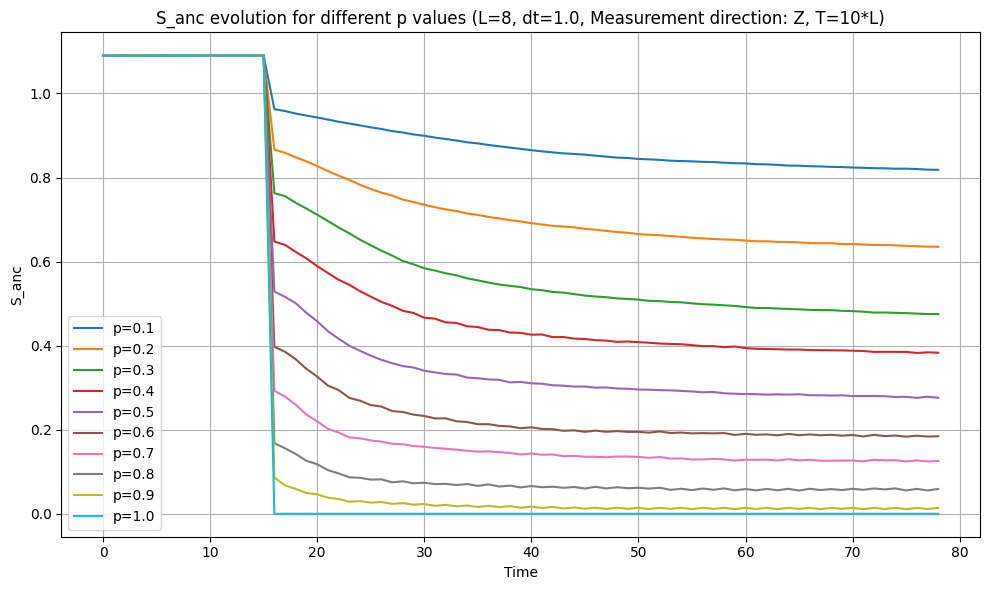

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=8, dt=1.0, Measurement direction: Z, T=10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_8_vs_t10L_z_ghz.svg')
plt.show()


### Analysing half-chain entropy dynamics

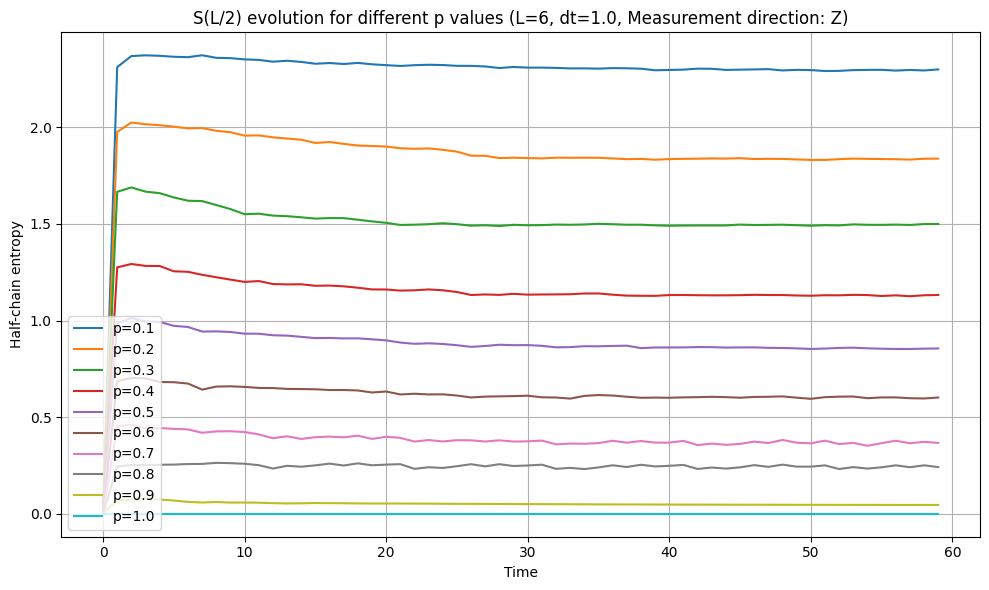

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_6_vs_t_z.svg')
plt.show()


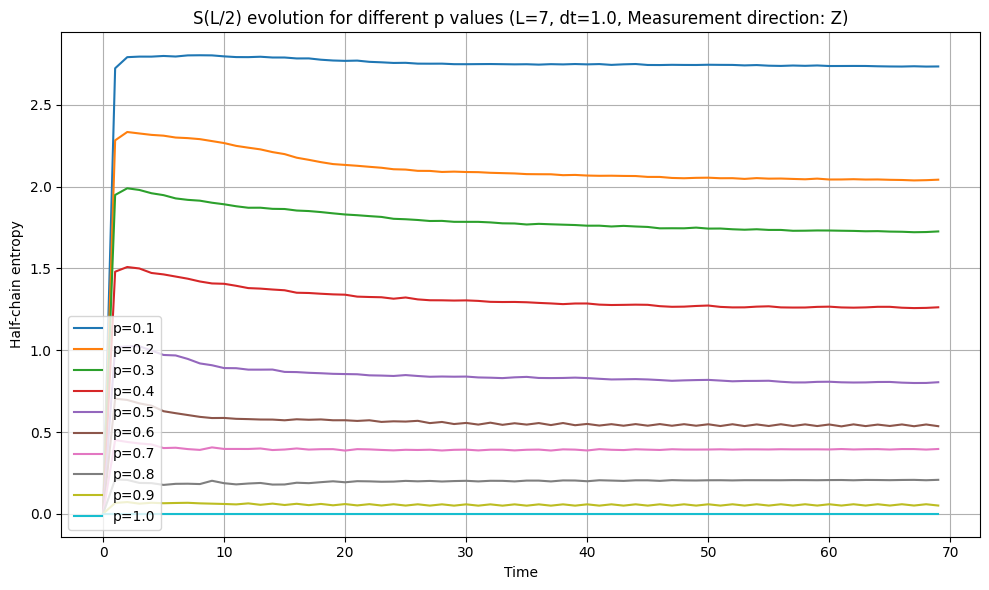

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_7_vs_t_z.svg')
plt.show()


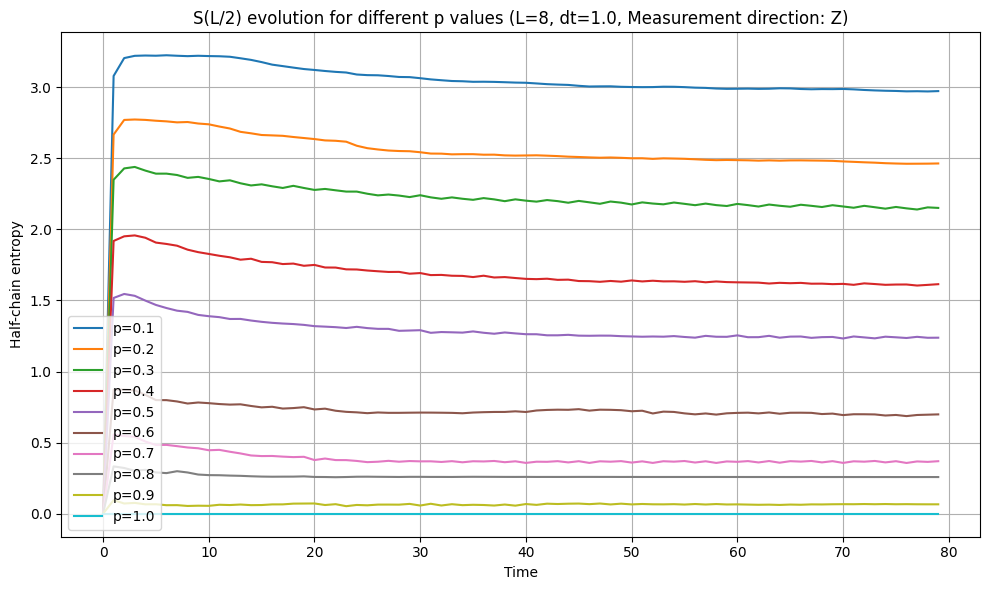

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_8_vs_t_z.svg')
plt.show()


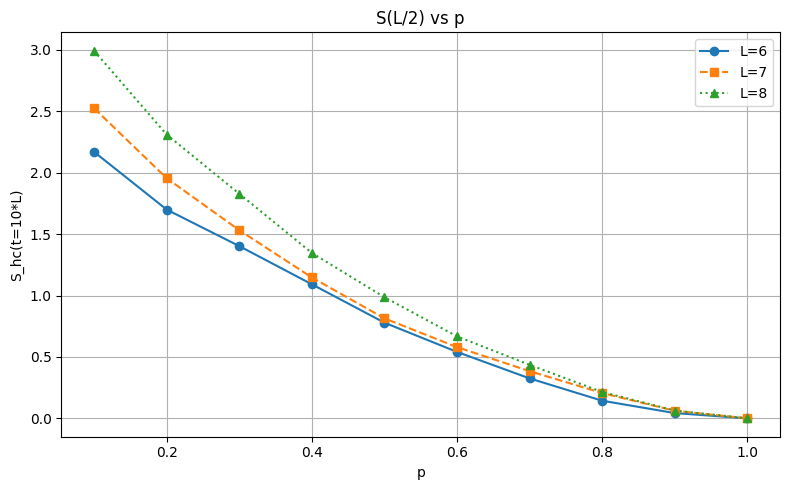

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_T10L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

### Half-chain entnaglement entropy evolution for 500 shots and T = 12 * L

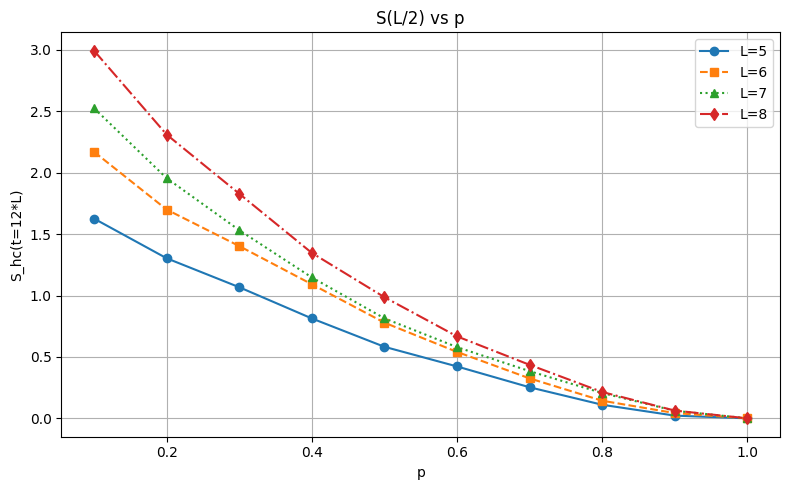

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc(t=12*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

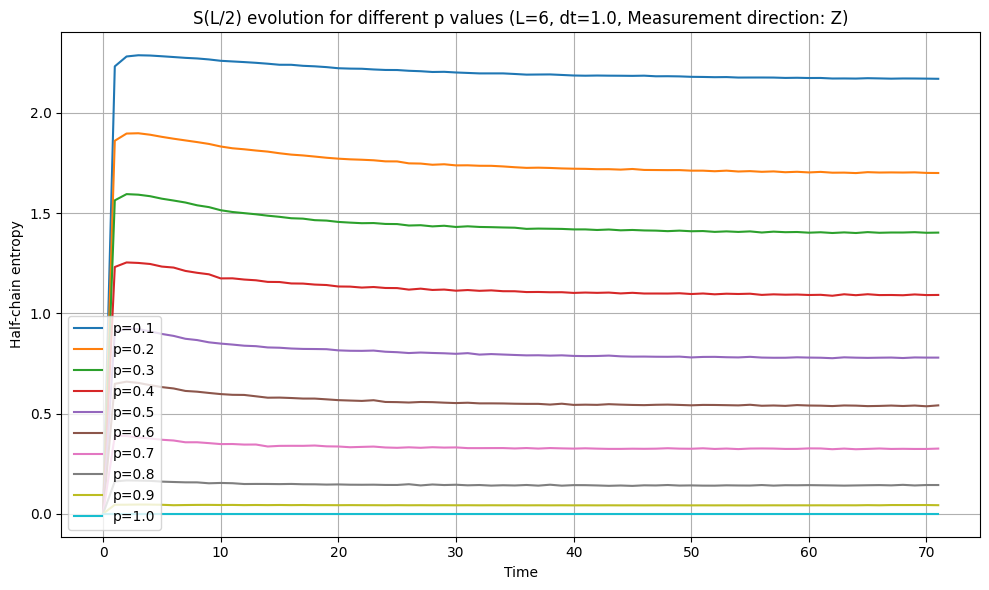

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_6_vs_t12L_z.svg')
plt.show()

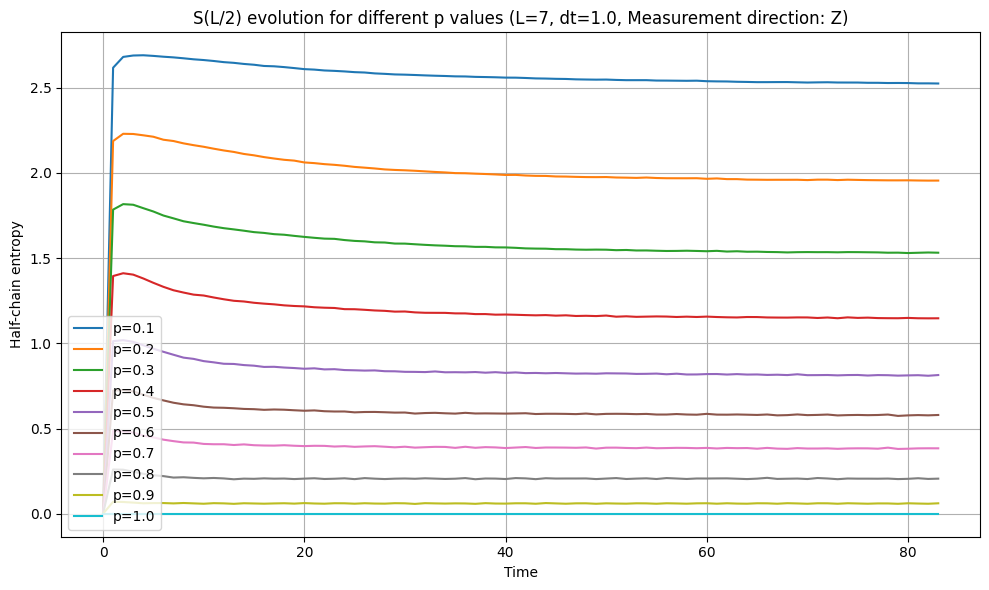

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_7_vs_t12L_z.svg')
plt.show()

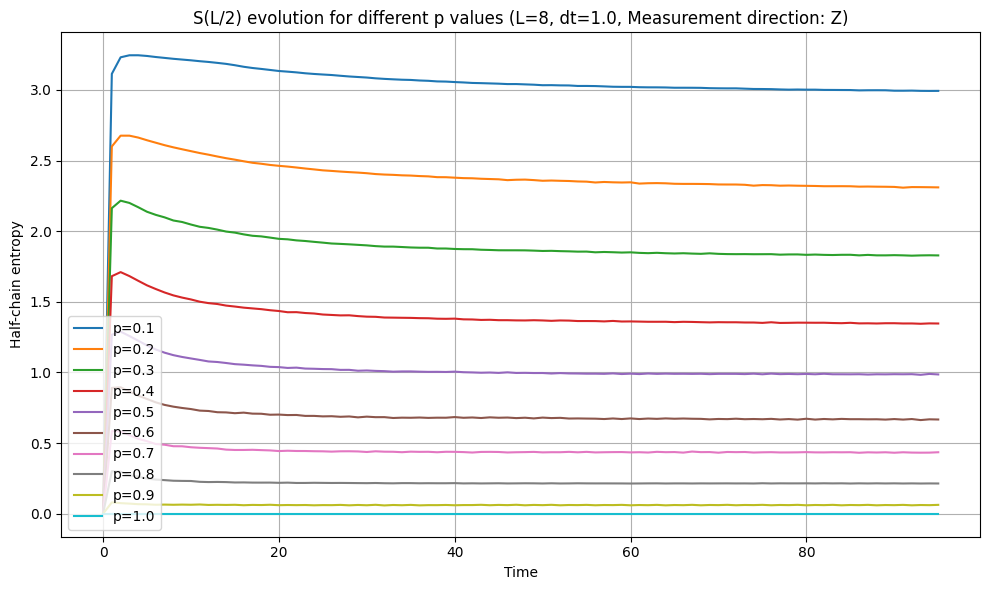

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

## Plotting the fluctuations of $S_{hc}$

In [51]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc'

# List of L values you want to process
L_values = [5, 6, 7]

# Loop through each L value
for L in L_values:
    # Path to the "var" subdirectory inside each L folder
    data_dir = os.path.join(base_dir, f'L_{L}', 'var')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the "var" directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the last data points
    last_data_points = []

    # Loop through the files and collect the last data point
    for file_name in file_list:
        file_path = os.path.join(data_dir, file_name)
        data = np.load(file_path)
        last_data_points.append(data[-1])  # Collect last data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L_var{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")


Data for L=5 saved to: /Users/uditvarma/Documents/s3_data/mean_anc/timeT_points_L_var5.npy
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_anc/timeT_points_L_var6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_anc/timeT_points_L_var7.npy


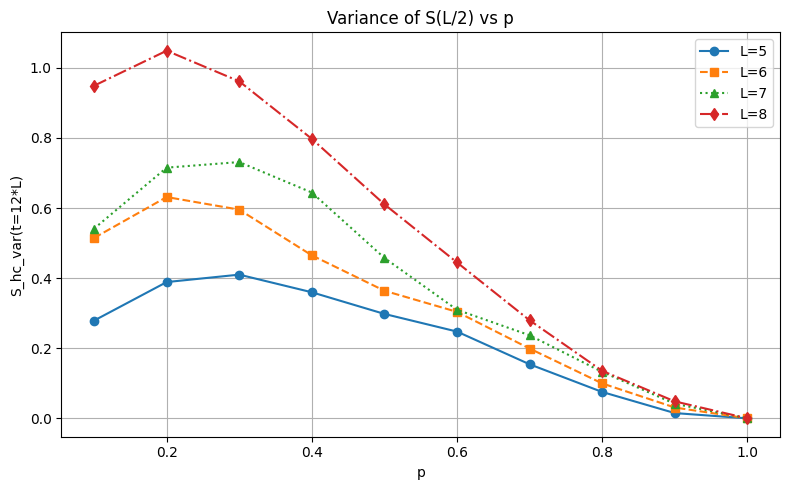

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L_var{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Variance of S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc_var(t=12*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_var_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

### Analysing half-chain entropy for $(S^z)^2$ measurements

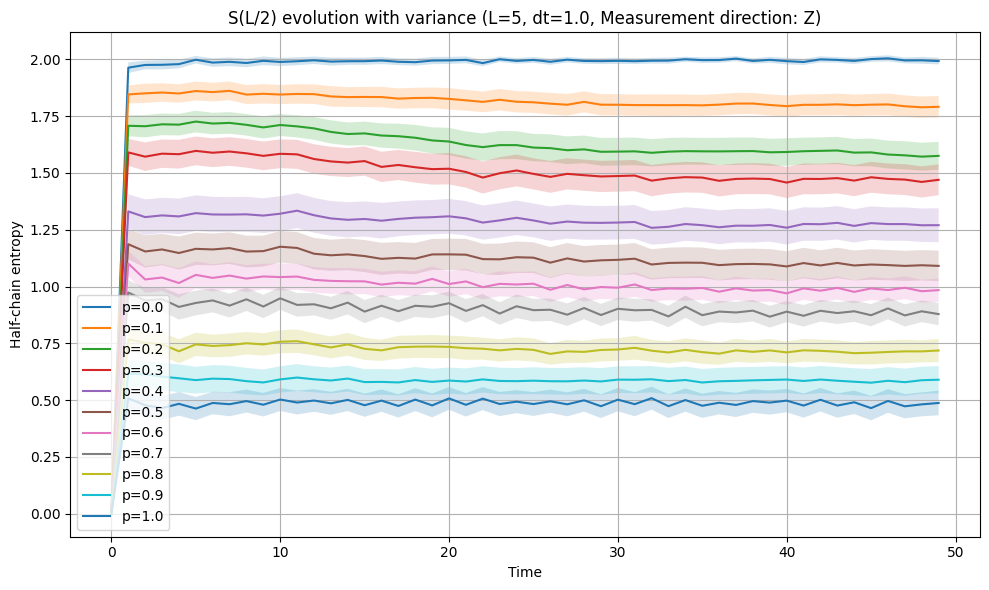

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(data_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var)/np.sqrt(50)

    t = np.arange(len(mean))  # time axis (assuming uniform steps)

    # plot mean line
    plt.plot(t, mean, label=f'p={p}')
    # shaded region = ± std
    plt.fill_between(t, mean-std, mean+std, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_5_vs_t_var.svg')
plt.show()

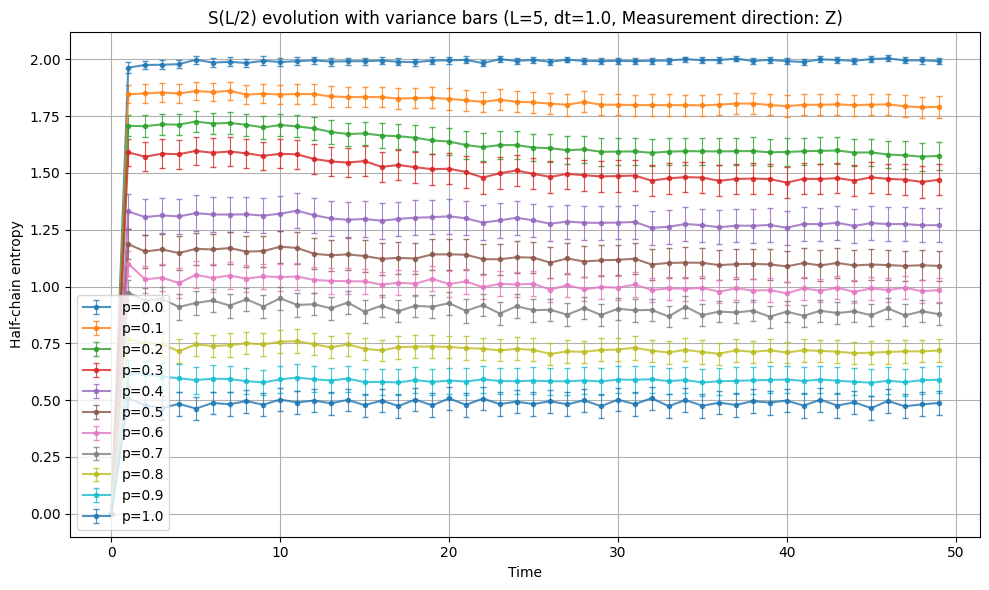

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(data_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var)/np.sqrt(50)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_5_vs_t_varbars.svg')
plt.show()


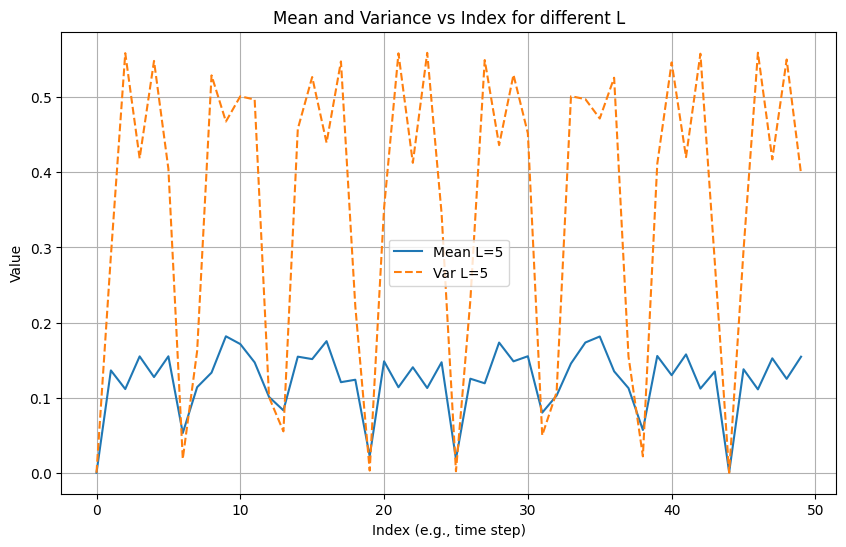

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Path to parent directory containing different L folders
base_dir = "/Users/uditvarma/Documents/s3_data/mean_hc"

# Find all L_* folders
L_dirs = sorted(glob.glob(os.path.join(base_dir, "L_*")))

plt.figure(figsize=(10,6))

for L_dir in L_dirs:
    L_val = L_dir.split("_")[-1]  # extract L value
    
    # Load mean and variance files
    mean_file = os.path.join(L_dir, f"Emean_L{L_val},T50.0,dt1.0,p0.0_hc.npy")
    var_file  = os.path.join(L_dir, "var", f"Evar_L{L_val},T50.0,dt1.0,p0.0_hc.npy")
    
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        
        # Plot mean
        plt.plot(mean_data, label=f"Mean L={L_val}")
        
        # Optional: plot variance on same axes (or separate figure)
        plt.plot(var_data, '--', label=f"Var L={L_val}")

plt.xlabel("Index (e.g., time step)")
plt.ylabel("Value")
plt.title("Mean and Variance vs Index for different L")
plt.legend()
plt.grid(True)
plt.show()


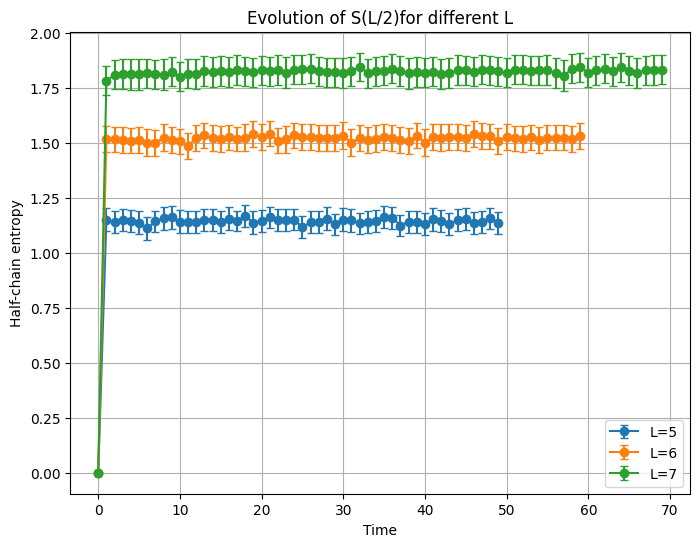

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import os

# Path to your folder
path = "/Users/uditvarma/Documents/s3_data/mean_hc/"

# Find all Emean and Evar files
mean_files = sorted(glob.glob(os.path.join(path, "Emean_*.npy")))
var_files  = sorted(glob.glob(os.path.join(path, "Evar_*.npy")))

# Regex to extract L
pattern = re.compile(r"L(\d+)")

plt.figure(figsize=(8,6))

for mfile in mean_files:
    # Matching variance file
    vfile = mfile.replace("Emean", "Evar")
    if not os.path.exists(vfile):
        continue
    
    # Extract L value
    L = int(pattern.search(mfile).group(1))

    # Load arrays
    mean = np.load(mfile)
    var  = np.load(vfile)
    err  = np.sqrt(var)/np.sqrt(50)  # Standard error

    # Plot with error bars
    x = np.arange(len(mean))
    plt.errorbar(x, mean, yerr=err, label=f"L={L}", capsize=3, marker='o', linestyle='-')

plt.xlabel("Time")
plt.ylabel("Half-chain entropy")
plt.title("Evolution of S(L/2)for different L")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('S_hc_vs_t_varbars_allL.svg')


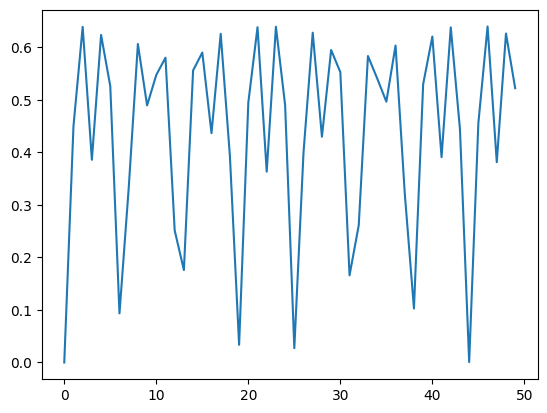

In [9]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L5,T50.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

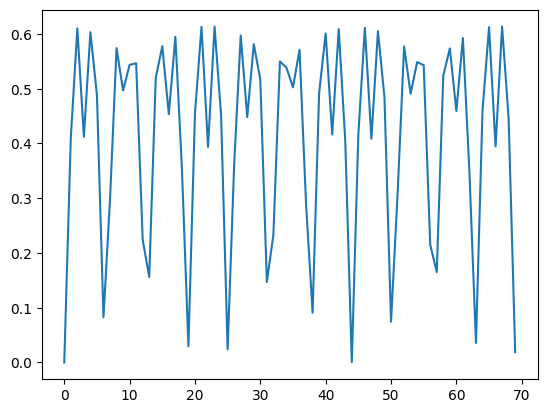

In [26]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

In [20]:
data

array([-1.77635684e-16,  4.10263818e-01,  6.10115457e-01,  4.12170063e-01,
        6.03190794e-01,  4.88073557e-01,  8.25440090e-02,  2.97428247e-01,
        5.74156083e-01,  4.96696072e-01,  5.43599793e-01,  5.46402921e-01,
        2.24120302e-01,  1.56125204e-01,  5.20309950e-01,  5.77517188e-01,
        4.53590937e-01,  5.94809635e-01,  3.55006564e-01,  2.95638488e-02,
        4.55228864e-01,  6.13027640e-01,  3.93693031e-01,  6.13430341e-01,
        4.50413480e-01,  2.39521635e-02,  3.62073540e-01,  5.97131835e-01,
        4.48098068e-01,  5.81299387e-01,  5.16701185e-01,  1.47106548e-01,
        2.33063190e-01,  5.49792031e-01,  5.38439659e-01,  5.02474961e-01,
        5.71062744e-01,  2.89184010e-01,  9.06910367e-02,  4.92088244e-01,
        6.00957512e-01,  4.16238948e-01,  6.08889629e-01,  4.04321930e-01,
        6.86666396e-04,  4.16060962e-01,  6.11168065e-01,  4.08397449e-01,
        6.05207267e-01,  4.83984189e-01,  7.45979399e-02,  3.05549142e-01,
        5.77184242e-01,  

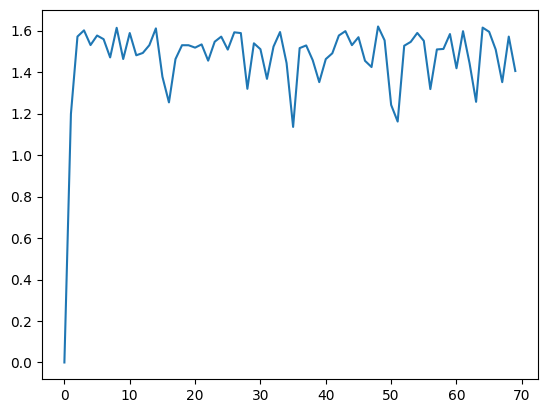

In [30]:
data1 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
data2 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")
plt.plot(data1)
#plt.plot(data2)

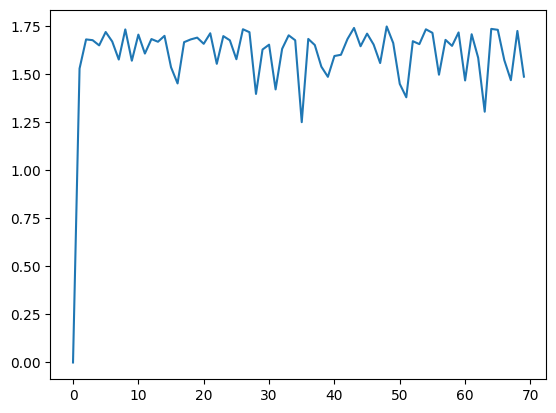

In [33]:
data1 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
data2 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")
plt.plot(data1)
#plt.plot(data2)

In [ ]:
data1 

array([-1.77635684e-16,  4.10263818e-01,  6.10115457e-01,  4.12170063e-01,
        6.03190794e-01,  4.88073557e-01,  8.25440090e-02,  2.97428247e-01,
        5.74156083e-01,  4.96696072e-01,  5.43599793e-01,  5.46402921e-01,
        2.24120302e-01,  1.56125204e-01,  5.20309950e-01,  5.77517188e-01,
        4.53590937e-01,  5.94809635e-01,  3.55006564e-01,  2.95638488e-02,
        4.55228864e-01,  6.13027640e-01,  3.93693031e-01,  6.13430341e-01,
        4.50413480e-01,  2.39521635e-02,  3.62073540e-01,  5.97131835e-01,
        4.48098068e-01,  5.81299387e-01,  5.16701185e-01,  1.47106548e-01,
        2.33063190e-01,  5.49792031e-01,  5.38439659e-01,  5.02474961e-01,
        5.71062744e-01,  2.89184010e-01,  9.06910367e-02,  4.92088244e-01,
        6.00957512e-01,  4.16238948e-01,  6.08889629e-01,  4.04321930e-01,
        6.86666396e-04,  4.16060962e-01,  6.11168065e-01,  4.08397449e-01,
        6.05207267e-01,  4.83984189e-01,  7.45979399e-02,  3.05549142e-01,
        5.77184242e-01,  

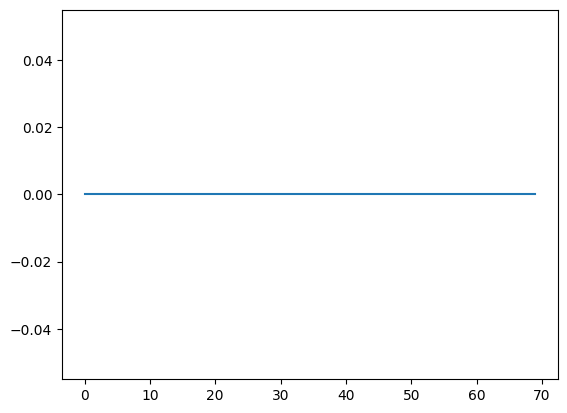

In [21]:
plt.plot(data-data1)

### Charge-sharpening dynamics

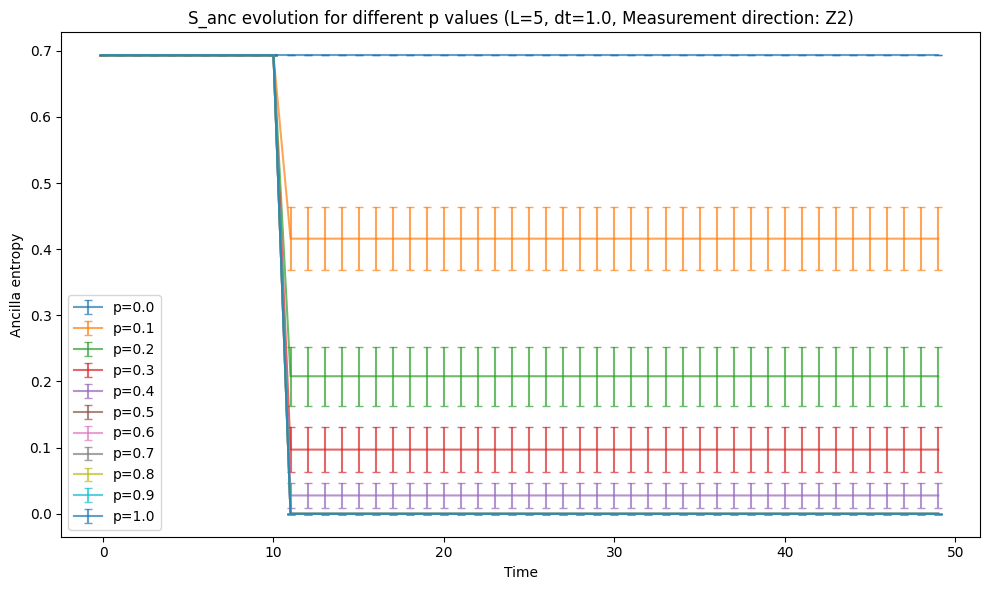

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Parameters
T = 50
dt = 1.0
p_values = np.round(np.arange(0.0, 1.01, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L5,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L5,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_5_vs_t_z2.svg')
plt.show()


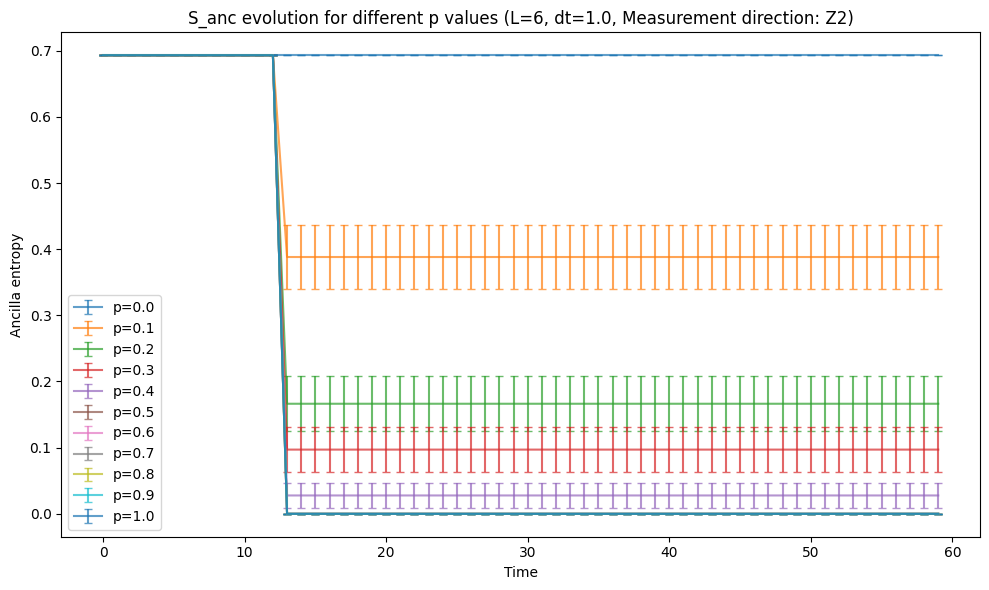

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.01, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_6_vs_t_z2.svg')
plt.show()


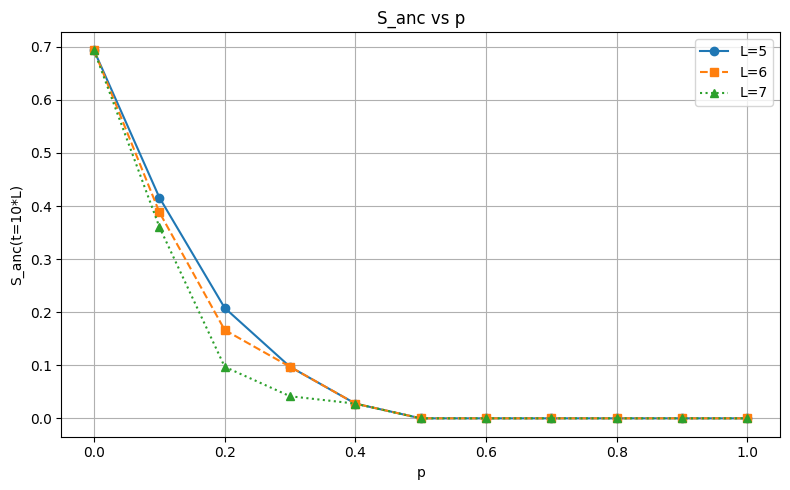

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S_anc vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T10L_vs_p_z2.svg')

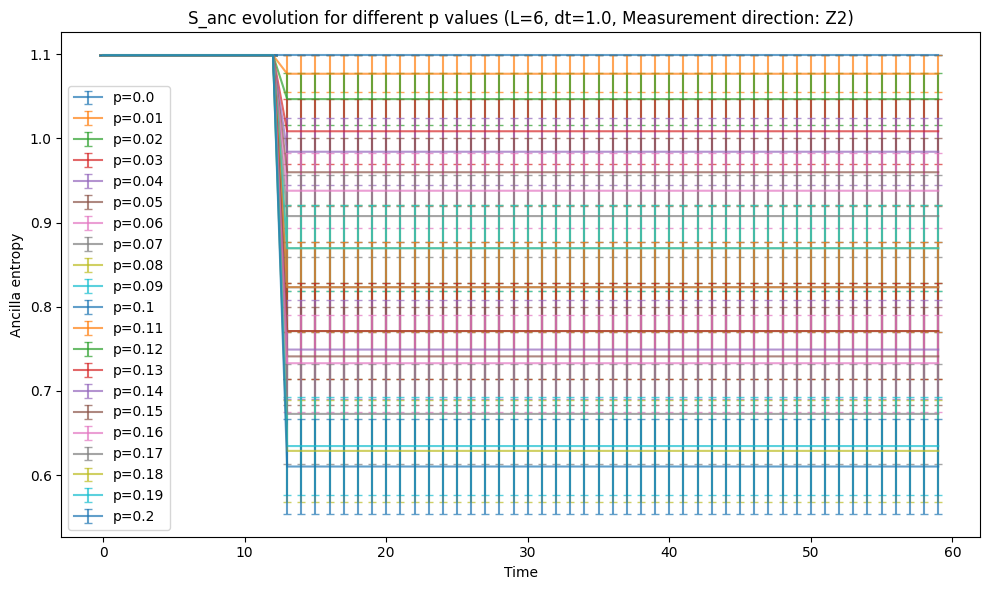

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 0.21, 0.01), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_anc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_anc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


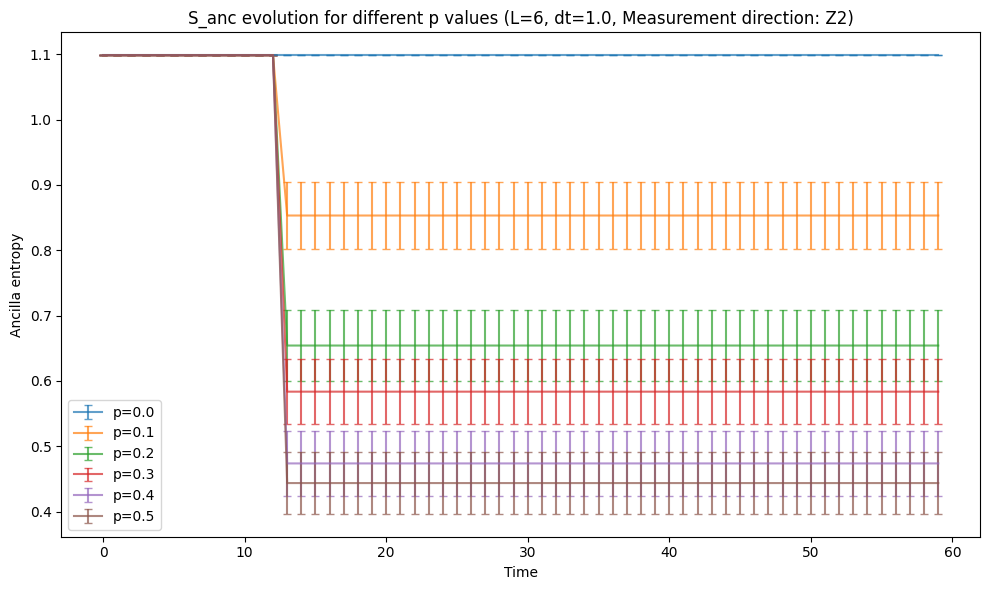

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 0.6, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_anc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_anc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


In [50]:
np.load("/Users/uditvarma/Documents/s3_data/data_anc/L6,T60,dt1.0,p0.1,dirZ2,s45_anc.npy")

array([ 1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00, -8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [28]:
data1

array([1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229])

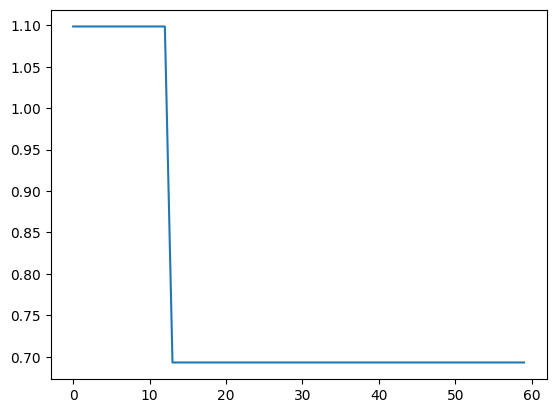

In [12]:
plt.plot(data1)

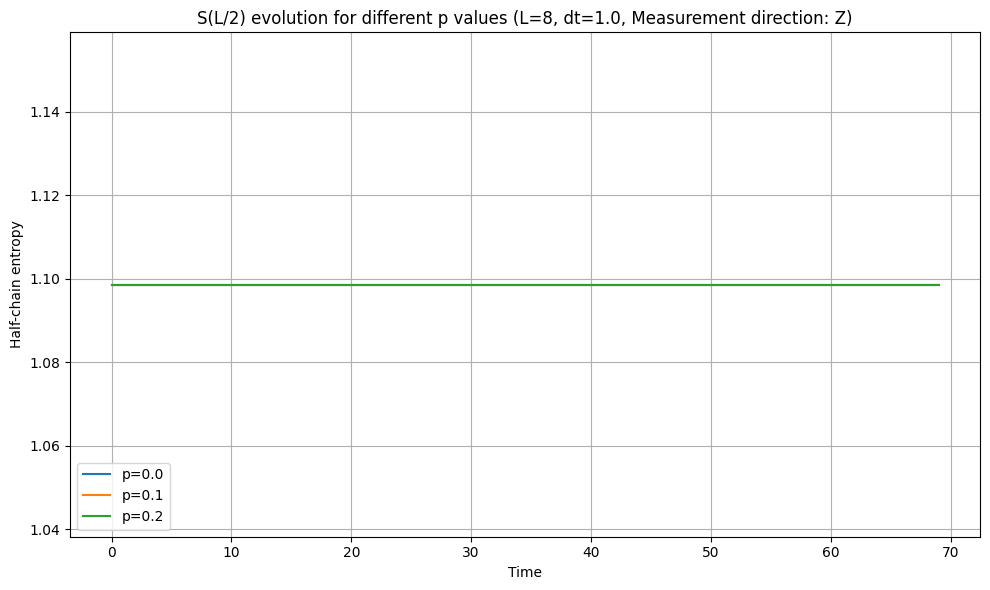

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t_z.svg')
plt.show()


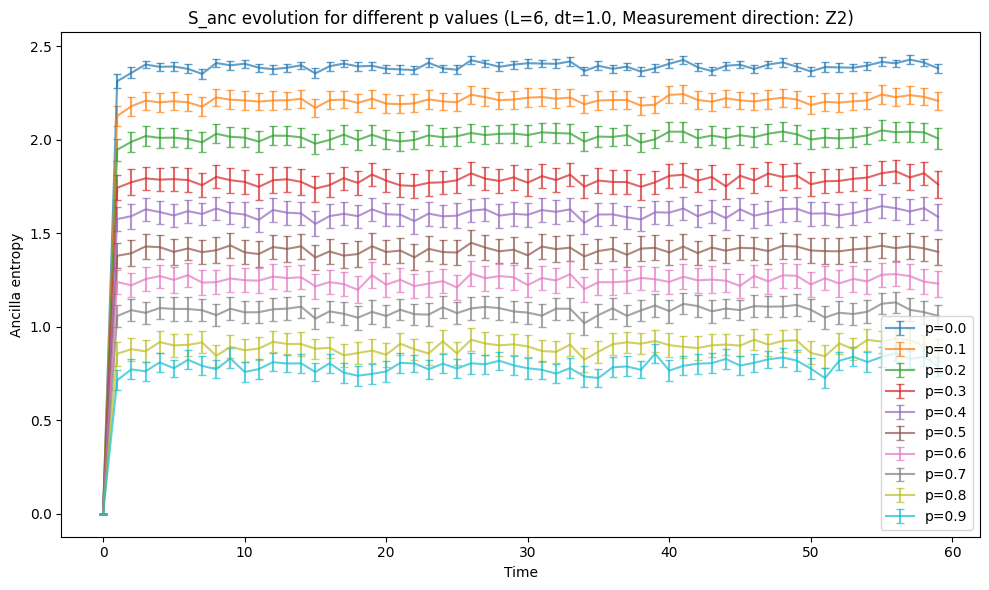

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"
L = 6
# Parameters
T = 10.0*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.0, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
#plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


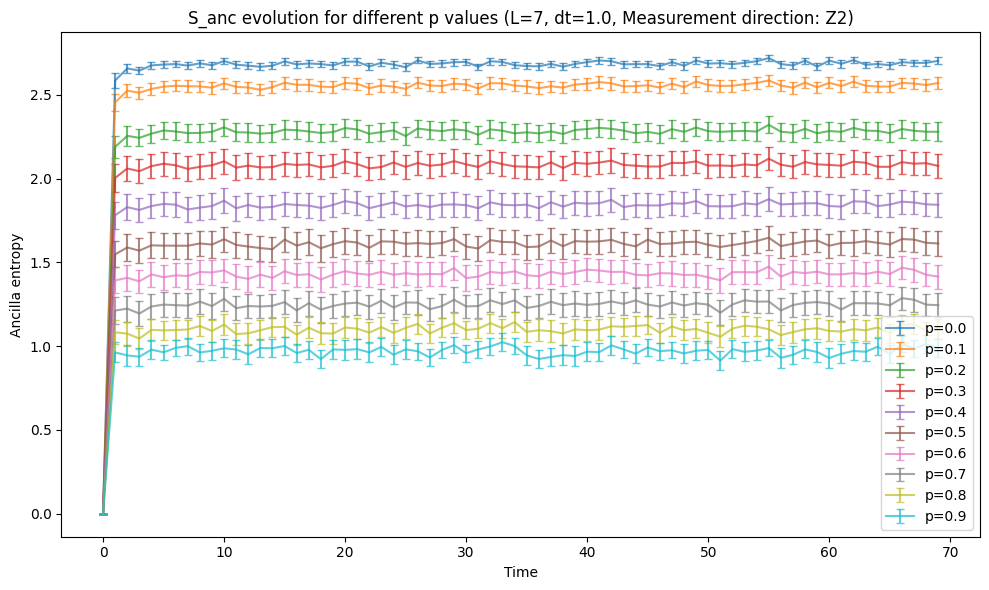

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"
L = 7
# Parameters
T = 10.0*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.0, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L7,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L7,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=7, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
#plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


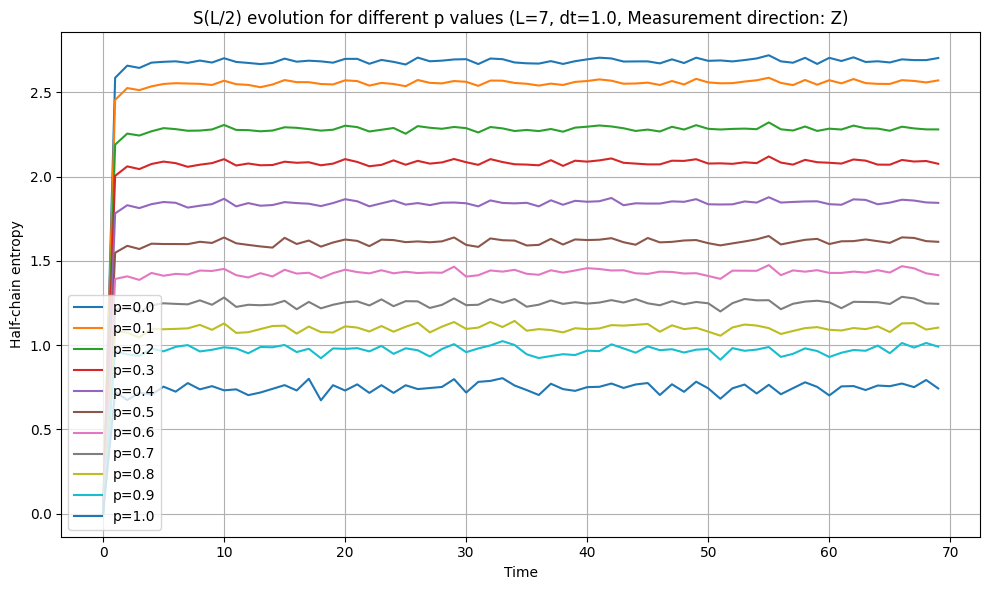

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_71149/2100876519.py:38: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta \mathcal{Q}^2$')         # or Y-axis meaning


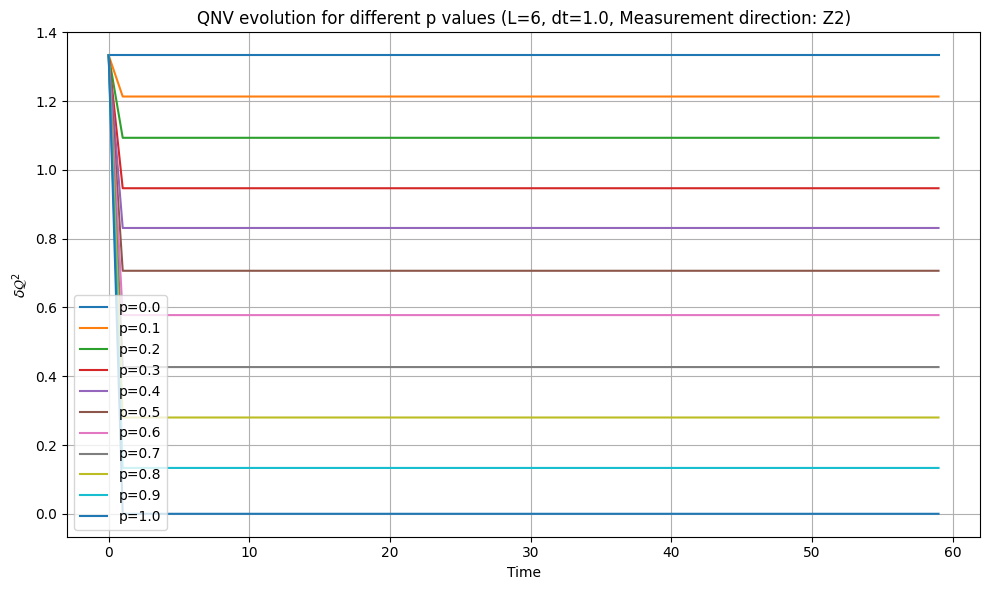

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_qnv/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_qnv)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('$\delta \mathcal{Q}^2$')         # or Y-axis meaning
plt.title('QNV evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

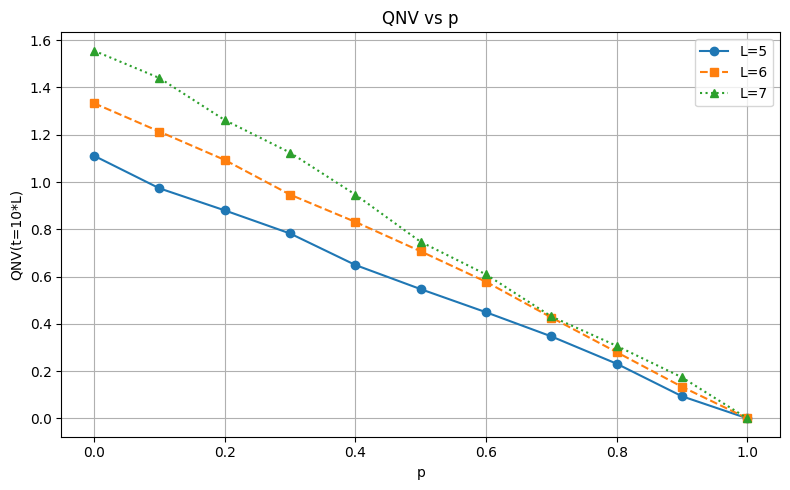

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_qnv'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('QNV vs p')
plt.xlabel('p')
plt.ylabel('QNV(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig('S_hc_T10L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

In [31]:
import os
import re
import numpy as np
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-6   # <-- change this as needed

# Data structure: dict[(L, p)] = count
results = defaultdict(int)
totals = defaultdict(int)

# Regex to extract L, p, s from filename
# Example filename: L5,T50.0,dt1.0,p0.0,dirZ,s1_Qnv.npy
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            s = int(match.group(3))  # not strictly needed except for completeness

            fpath = os.path.join(root, fname)
            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Print summary
print(f"Tolerance = {tolerance}\n")
for (L, p) in sorted(totals.keys()):
    total = totals[(L, p)]
    good = results[(L, p)]
    print(f"L={L}, p={p:.2f} -> {good}/{total} files below tolerance")


Tolerance = 1e-06

L=5, p=0.00 -> 0/50 files below tolerance
L=5, p=0.10 -> 0/50 files below tolerance
L=5, p=0.20 -> 0/50 files below tolerance
L=5, p=0.30 -> 0/50 files below tolerance
L=5, p=0.40 -> 3/50 files below tolerance
L=5, p=0.50 -> 4/50 files below tolerance
L=5, p=0.60 -> 7/50 files below tolerance
L=5, p=0.70 -> 10/50 files below tolerance
L=5, p=0.80 -> 19/50 files below tolerance
L=5, p=0.90 -> 33/50 files below tolerance
L=5, p=1.00 -> 50/50 files below tolerance
L=6, p=0.00 -> 0/50 files below tolerance
L=6, p=0.10 -> 0/50 files below tolerance
L=6, p=0.20 -> 0/50 files below tolerance
L=6, p=0.30 -> 0/50 files below tolerance
L=6, p=0.40 -> 0/50 files below tolerance
L=6, p=0.50 -> 0/50 files below tolerance
L=6, p=0.60 -> 3/50 files below tolerance
L=6, p=0.70 -> 8/50 files below tolerance
L=6, p=0.80 -> 17/50 files below tolerance
L=6, p=0.90 -> 28/50 files below tolerance
L=6, p=1.00 -> 50/50 files below tolerance
L=7, p=0.00 -> 0/50 files below tolerance
L=7, p=0

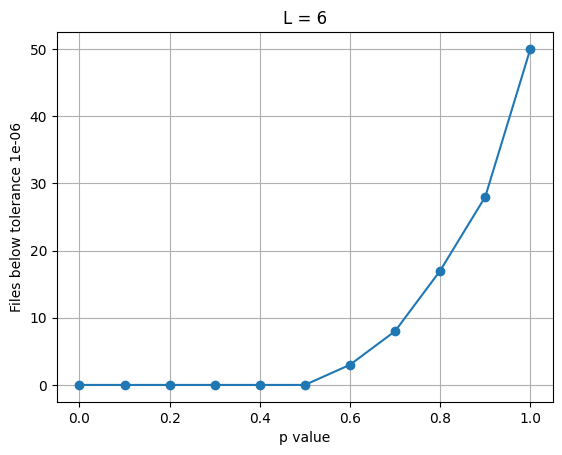

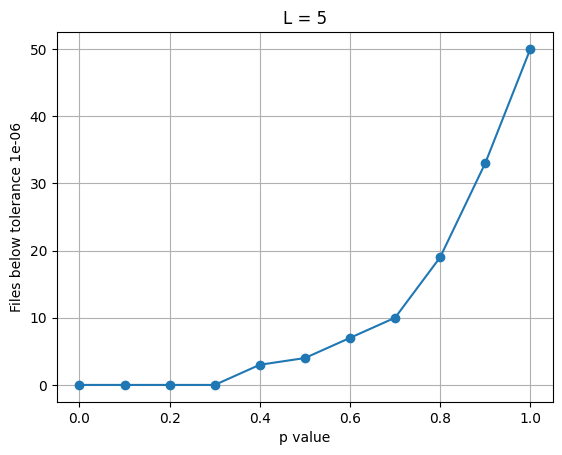

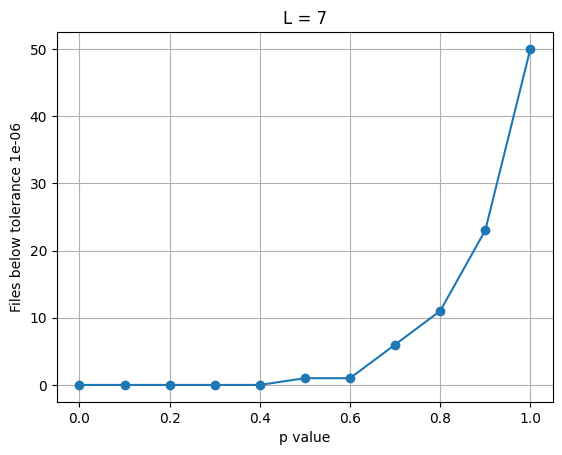

In [32]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-6   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    data_by_L[L].append((p, count_below))

# Plot for each L
for L, values in data_by_L.items():
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    counts = [count for _, count in values]

    plt.figure()
    plt.plot(ps, counts, marker="o")
    plt.xlabel("p value")
    plt.ylabel(f"Files below tolerance {tolerance}")
    plt.title(f"L = {L}")
    plt.grid(True)
    plt.show()


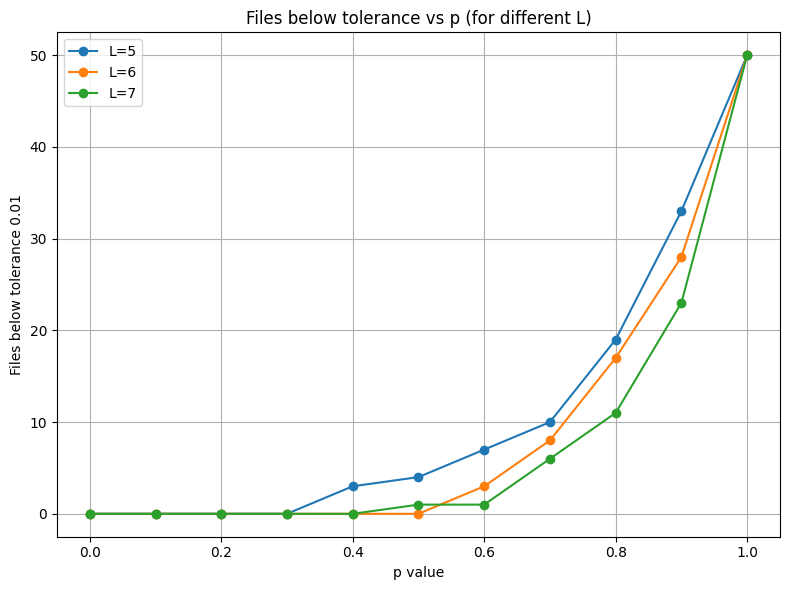

In [34]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-2   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    data_by_L[L].append((p, count_below))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    counts = [count for _, count in values]
    plt.plot(ps, counts, marker="o", label=f"L={L}")

plt.xlabel("p value")
plt.ylabel(f"Files below tolerance {tolerance}")
plt.title("Files below tolerance vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


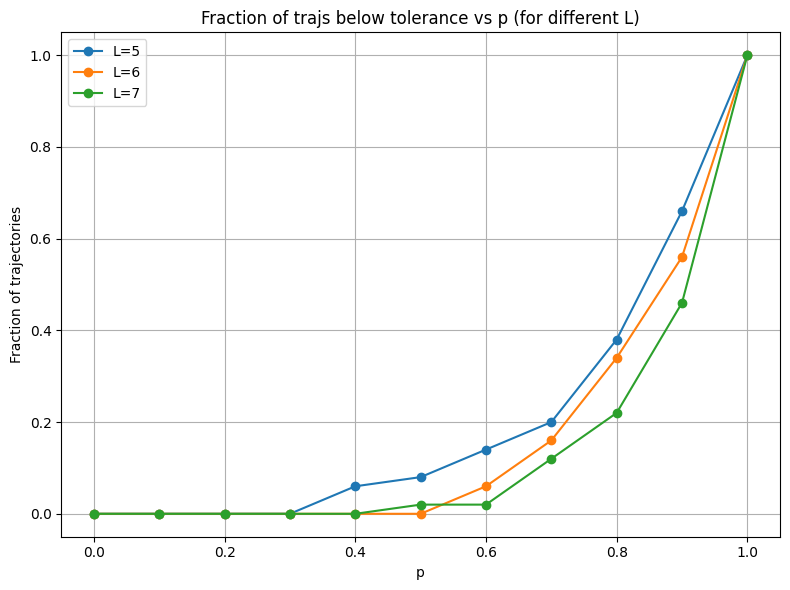

In [41]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-2   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel(f"Fraction of trajectories")
plt.title("Fraction of trajs below tolerance vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
